<a href="https://colab.research.google.com/github/aminteer/image-to-video-veo2-test/blob/main/vision/getting-started/veo2_video_generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Veo 2 Video Generation

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo2_video_generation.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Run in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fvision%2Fgetting-started%2Fveo2_video_generation.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/vision/getting-started/veo2_video_generation.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo2_video_generation.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo2_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo2_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo2_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo2_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/vision/getting-started/veo2_video_generation.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | |
|-|-|
|Author(s) | [Katie Nguyen](https://github.com/katiemn) |

## Overview

### Veo 2

Veo 2 on Vertex AI brings Google's state of the art video generation capabilities to application developers. It's capable of creating videos with astonishing detail that simulate real-world physics across a wide range of visual styles.

In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with Veo 2 and generate new videos from text prompts and input images.

## Get started

### Install Google Gen AI SDK for Python and other libraries

In [3]:
%pip install --upgrade --quiet google-genai
%pip install -q mediapy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.3/196.3 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00


### Authenticate your notebook environment (Colab only)

If you are running this notebook on Google Colab, run the following cell to authenticate your environment.

In [4]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [5]:
import time
import urllib

from PIL import Image as PIL_Image
from google import genai
from google.genai import types
import matplotlib.pyplot as plt
import mediapy as media

### Set Google Cloud project information and create client

To get started using Vertex AI, you must have an existing Google Cloud project and [enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com).

Learn more about [setting up a project and a development environment](https://cloud.google.com/vertex-ai/docs/start/cloud-environment).

In [6]:
import os

PROJECT_ID = "[dl-experiments]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

### Define helper functions to display media

In [7]:
def show_video(gcs_uri):
    file_name = gcs_uri.split("/")[-1]
    !gsutil cp {gcs_uri} {file_name}
    media.show_video(media.read_video(file_name), height=500)


def display_images(image) -> None:
    fig, axis = plt.subplots(1, 1, figsize=(12, 6))
    axis.imshow(image)
    axis.set_title("Starting Image")
    axis.axis("off")
    plt.show()

### Load the video generation model

In [8]:
video_model = "veo-2.0-generate-001"

### Generate videos from a text prompt

With Veo 2, you have the option to generate 8 second videos from a text prompt. In order to generate a video in the following sample, specify the following info:
- **Prompt:** A detailed description of the video you would like to see.
- **Aspect ratio:** Select either 16:9 or 9:16.
- **File location:** The generated video will be shown below with support from a previously defined helper function. The video will also be stored in Cloud Storage once video generation is complete. Specify the file path where you would like this video to be stored in the output_gcs field.
- **Number of videos:** Set this value to 1 or 2.
- **Video duration:** Can 5, 6, 7, or 8 seconds.
- **Prompt enhancement:** The `veo-2.0-generate-001` model offers the option to enhance your provided prompt. To utilize this feature, set `enhance_prompt` to True. A new, detailed prompt will be created from your original one to help generate higher quality videos that better adhere to your prompt's intent.

In [ ]:
prompt = "a cat reading a book"  # @param {type: 'string'}
aspect_ratio = "16:9"  # @param ["16:9", "9:16"]
output_gcs = "gs://"  # @param {type: 'string'}

operation = client.models.generate_videos(
    model=video_model,
    prompt=prompt,
    config=types.GenerateVideosConfig(
        aspect_ratio=aspect_ratio,
        output_gcs_uri=output_gcs,
        number_of_videos=1,
        duration_seconds=5,
        person_generation="dont_allow",
        enhance_prompt=True,
    ),
)

while not operation.done:
    time.sleep(15)
    operation = client.operations.get(operation)
    print(operation)

if operation.response:
    show_video(operation.result.generated_videos[0].video.uri)

When generating videos of people you can also set the `person_generation` parameter accordingly:
* `person_generation`: allow_adult, dont_allow

In [ ]:
prompt = "sculpting a bowl on a pottery wheel"  # @param {type: 'string'}
aspect_ratio = "9:16"  # @param ["16:9", "9:16"]
output_gcs = "gs://"  # @param {type: 'string'}

operation = client.models.generate_videos(
    model=video_model,
    prompt=prompt,
    config=types.GenerateVideosConfig(
        aspect_ratio=aspect_ratio,
        output_gcs_uri=output_gcs,
        number_of_videos=1,
        duration_seconds=7,
        person_generation="allow_adult",
        enhance_prompt=True,
    ),
)

while not operation.done:
    time.sleep(15)
    operation = client.operations.get(operation)
    print(operation)

if operation.response:
    show_video(operation.result.generated_videos[0].video.uri)

### Generate videos from an image


#### Load the starting image

You can also generate a video by starting with an input image. Add the Cloud Storage file location of the image you'd like to use to display it below.

In [11]:
# set up access to gcp bucket
from google.cloud import storage
from PIL import Image
import io

# Initialize GCS client (ensure GOOGLE_APPLICATION_CREDENTIALS is set)
client = storage.Client()

# Specify your bucket name and image path
bucket_name = 'vibe-fun-image-move'
image_blob_path = 'jdog.jpg'

# Get the bucket and blob
bucket = client.bucket(bucket_name)
blob = bucket.blob(image_blob_path)

# Download image data as bytes
image_bytes = blob.download_as_bytes()

# # Load image using PIL
# image = Image.open(io.BytesIO(image_bytes))

# # Show the image (optional)
# image.show()


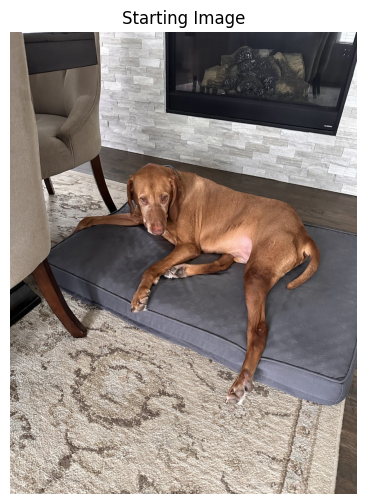

In [12]:
image_show = PIL_Image.open(io.BytesIO(image_bytes))
display_images(image_show)

# image_show = PIL_Image.open(image_loc)
#     # urllib.request.urlopen(
#     #    # "https://storage.googleapis.com/cloud-samples-data/generative-ai/image/flowers.png"
#     # )
# #)

# display_images(image_show)

#### Send the video request

If you're generating a video from an image you don't need to provide a prompt. The model will simply add motion to your image.


In [ ]:
# image_gcs = (
#     "gs://cloud-samples-data/generative-ai/image/flowers.png"  # @param {type: 'string'}
# )

image_gcs = "gs://vibe-fun-image-move/jdog.jpg"
aspect_ratio = "9:16"  # @param ["16:9", "9:16"]
output_gcs = "gs://vibe-fun-image-move"  # @param {type: 'string'}

prompt = "the dog stands up on his hind leg and balances on one leg with a worried look"

operation = client.models.generate_videos(
    model=video_model,
    promt=prompt, #added awm
    image=types.Image(
        gcs_uri=image_gcs,
        mime_type="image/png",
    ),
    config=types.GenerateVideosConfig(
        aspect_ratio=aspect_ratio,
        output_gcs_uri=output_gcs,
        number_of_videos=1,
        duration_seconds=8,
        #person_generation="allow_adult",
        person_generation = "dont_allow", #added awm
        enhance_prompt=True, #added awm
    ),
)

while not operation.done:
    time.sleep(15)
    operation = client.operations.get(operation)
    print(operation)

if operation.response:
    show_video(operation.result.generated_videos[0].video.uri)